<a href="https://colab.research.google.com/github/SebastianDazaLeyva/14-MBID-TRABAJO-FINAL-MASTER-SEBASTIAN-DAZA-LEYVA/blob/main/14_MBID_TFM_SEBASTIAN_DAZA_LEYVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este código se desarrollo en gran medida a partir de la gran explicación desarrollada por Rounak Banik en su libro Hands-On Recommendation Systems with Python : Start Building Powerful and Personalized, Recommendation Engines with Python

#**Carga de librerias**

Cargamos las librerias que vamos a usar a lo largo del proyecto

In [ ]:
#Carga conjunto de datos
import io
from google.colab import files

#Administración DataFrames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Implementación y evaluación Recommendation Systems
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

#**Carga conjunto de datos**

**Cargamos los ficheros:**

1. Entrega: Fichero con la información correspondiente a las entregas recibidas por cada cliente por cada categoría 
2. Apertura: Fichero con la infromación correspondiente a las aperturas realizadas por cada cliente por cada categoría



##**Carga, limpieza y consolidación fichero entrega**

In [ ]:
uploaded = files.upload()

In [ ]:
entrega_mayo = pd.read_csv(io.BytesIO(uploaded['ENTREGA 31-05-2021 (Cargue 28-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_junio = pd.read_csv(io.BytesIO(uploaded['ENTREGA 30-06-2021 (Cargue 28-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_julio = pd.read_csv(io.BytesIO(uploaded['ENTREGA 31-07-2021 (Cargue 31-08-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_agosto = pd.read_csv(io.BytesIO(uploaded['ENTREGA 31-08-2021 (Cargue 22-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_septiembre = pd.read_csv(io.BytesIO(uploaded['ENTREGA 30-09-2021 (Cargue 22-10-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_octubre = pd.read_csv(io.BytesIO(uploaded['ENTREGA 31-10-2021 (Cargue 29-11-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
entrega_noviembre = pd.read_csv(io.BytesIO(uploaded['ENTREGA 30-11-2021 (Cargue 22-12-2021).csv']), sep = ';', encoding = 'latin-1')

Consolidamos los diferentes archivos de entrega en un solo dataframe para su futura manipulación

In [ ]:
ficheros_entrega = [entrega_mayo, entrega_junio, entrega_julio, entrega_agosto,
            entrega_septiembre, entrega_octubre, entrega_noviembre]

In [ ]:
entrega_global = pd.concat(ficheros_entrega)

In [ ]:
entrega_global.head(5)

In [ ]:
entrega_global.shape

(4428103, 28)

In [ ]:
entrega_global.to_csv('ENTREGA_CONSOLIDADO.csv')

In [ ]:
files.download('ENTREGA_CONSOLIDADO.csv')

Seleccionamos las variables de interés para el proyecto

In [ ]:
entrega = entrega_global[['LLAVE', 'EVENTO', 'CALENDARIO', 'PRODUCTO', 'CANALES', 'INFORMATIVA','COMERCIAL_POLIZA', 'COMERCIAL_SERVICIOS']]

In [ ]:
entrega.head(5)

In [ ]:
entrega.shape

Agrupamos por cliente y sumamos el número de comunicaciones que ha recibido por cada actegoría

In [ ]:
entrega_final = entrega.groupby(['LLAVE']).sum()

In [ ]:
entrega_final.shape

In [ ]:
entrega_final.head(5)

In [ ]:
entrega_final.to_csv('ENTREGA_AGRUPADO.csv')

In [ ]:
files.download('ENTREGA_AGRUPADO.csv')

##**Carga, limpieza y consolidación fichero apertura**

In [ ]:
uploaded = files.upload()

In [ ]:
apertura_mayo = pd.read_csv(io.BytesIO(uploaded['APERTURA 31-05-2021 (Cargue 28-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_junio = pd.read_csv(io.BytesIO(uploaded['APERTURA 30-06-2021 (Cargue 28-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_julio = pd.read_csv(io.BytesIO(uploaded['APERTURA 31-07-2021 (Cargue 31-08-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_agosto = pd.read_csv(io.BytesIO(uploaded['APERTURA 31-08-2021 (Cargue 22-09-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_septiembre = pd.read_csv(io.BytesIO(uploaded['APERTURA 30-09-2021 (Cargue 22-10-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_octubre = pd.read_csv(io.BytesIO(uploaded['APERTURA 31-10-2021 (Cargue 29-11-2021).csv']), sep = ';', encoding = 'latin-1')

In [ ]:
apertura_noviembre = pd.read_csv(io.BytesIO(uploaded['APERTURA 30-11-2021 (Cargue 22-12-2021).csv']), sep = ';', encoding = 'latin-1')

Al igual que con los ficheros de entregas, vamos a consolidar y agrupar la información correspondiente a las aperturas de las comunicaciones recibidas por cada cliente 

In [ ]:
ficheros_apertura = [apertura_mayo, apertura_junio, apertura_julio, apertura_agosto,
                     apertura_septiembre, apertura_octubre, apertura_noviembre]

In [ ]:
apertura_global = pd.concat(ficheros_apertura)

In [ ]:
apertura_global.head(5)

In [ ]:
apertura_global.shape

(1409233, 27)

In [ ]:
apertura_global.to_csv('APERTURA_CONSOLIDADO.csv')

In [ ]:
files.download('APERTURA_CONSOLIDADO.csv')

In [ ]:
apertura = apertura_global[['LLAVE', 'EVENTO', 'CALENDARIO', 'PRODUCTO', 'CANALES', 'INFORMATIVA','COMERCIAL_POLIZA', 'COMERCIAL_SERVICIOS']]

In [ ]:
apertura.head(5)

In [ ]:
apertura.shape

(1409233, 8)

In [ ]:
apertura_final = apertura.groupby(['LLAVE']).sum()

In [ ]:
apertura_final.shape

In [ ]:
apertura_final.head(5)

In [ ]:
apertura_final.to_csv('APERTURA_AGRUPADO.csv')

In [ ]:
files.download('APERTURA_AGRUPADO.csv')

#**Creación de la matriz de calificaciones**

En este caso particular tomaremos el "rating" que cada cliente otorga a cada categoría, como la tasa de apertura que dicho cliente ha presentado ante ésta. En otras palabras, cuantas comunicaciones ha abierto, de las que ha recibido

In [ ]:
uploaded = files.upload()

In [ ]:
matriz_entrega = pd.read_csv(io.BytesIO(uploaded['ENTREGA_AGRUPADO.csv']), sep = ',', encoding = 'latin-1')

In [ ]:
matriz_entrega.head(5)

In [ ]:
matriz_apertura = pd.read_csv(io.BytesIO(uploaded['APERTURA_AGRUPADO.csv']), sep = ',', encoding = 'latin-1')

In [ ]:
matriz_apertura.head(5)

Ahora vamos a realizar un merge entre la matriz_entrega y la matriz_apertura, para posteriormente calcular la respectiva tasa de apertura de cada cliente frente a cada categoría

In [ ]:
matriz = pd.merge(matriz_entrega, matriz_apertura, on = 'LLAVE', how = 'left')

In [ ]:
matriz.head(5)

In [ ]:
matriz.fillna(0)

Definimos una función sencilla para calcular la tasa de apertura, incluyendo una excepción en caso de tener que dividir por cero, en el cual devolvemos un cero

In [ ]:
def tasa_apertura(x,y):
  try:
    return y/x
  except ZeroDivisionError:
    return 0

Aplicamos la función a cada categoría y agregamos la nueva serie a la matriz original

In [ ]:
#Categoria 'EVENTO'
x = matriz['EVENTO_x']
y = matriz['EVENTO_y']
matriz['EVENTO'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'CALENDARIO'
x = matriz['CALENDARIO_x']
y = matriz['CALENDARIO_y']
matriz['CALENDARIO'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'PRODUCTO'
x = matriz['PRODUCTO_x']
y = matriz['PRODUCTO_y']
matriz['PRODUCTO'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'CANALES'
x = matriz['CANALES_x']
y = matriz['CANALES_y']
matriz['CANALES'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'INFORMATIVA'
x = matriz['INFORMATIVA_x']
y = matriz['INFORMATIVA_y']
matriz['INFORMATIVA'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'COMERCIAL_POLIZA'
x = matriz['COMERCIAL_POLIZA_x']
y = matriz['COMERCIAL_POLIZA_y']
matriz['COMERCIAL_POLIZA'] = tasa_apertura(x,y)

In [ ]:
#Categoria 'COMERCIAL_SERVICIOS'
x = matriz['COMERCIAL_SERVICIOS_x']
y = matriz['COMERCIAL_SERVICIOS_y']
matriz['COMERCIAL_SERVICIOS'] = tasa_apertura(x,y)

In [ ]:
matriz.tail(5)

In [ ]:
matriz.to_csv('MATRIZ_CONSOLIDADA.csv')

In [ ]:
files.download('MATRIZ_CONSOLIDADA.csv')

Finalmente nos quedamos con los campos calculados y eliminamos los demás

In [ ]:
matriz_inicial = matriz[['LLAVE', 'EVENTO', 'CALENDARIO', 'PRODUCTO', 'CANALES', 'INFORMATIVA', 'COMERCIAL_POLIZA', 'COMERCIAL_SERVICIOS']]

In [ ]:
matriz_inicial.head(5)

Validamos que los vaolres mínimos y máximos calculados esten entre el rango 0-1

In [ ]:
matriz_inicial.max()

In [ ]:
matriz_inicial.min()

In [ ]:
matriz_inicial.to_csv('MATRIZ_INICIAL.csv')

In [ ]:
files.download('MATRIZ_INICIAL.csv')

#**Definición conjuntos Train y Test**

##**Estructuración matriz ratings**

Primeros creamos un nuevo DataFrame que nos permita dividir el total de "calificaciones" dadas, excluyendo los missing values, en los conjunto de train y test

In [ ]:
sub_matriz_evento = matriz_inicial[['LLAVE', 'EVENTO']]
sub_matriz_evento = sub_matriz_evento.assign(CATEGORIA_ID = 1)
sub_matriz_evento.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_evento.head(5)

In [ ]:
sub_matriz_calendario = matriz_inicial[['LLAVE', 'CALENDARIO']]
sub_matriz_calendario = sub_matriz_calendario.assign(CATEGORIA_ID = 2)
sub_matriz_calendario.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_calendario.head(5)

In [ ]:
sub_matriz_producto = matriz_inicial[['LLAVE', 'PRODUCTO']]
sub_matriz_producto = sub_matriz_producto.assign(CATEGORIA_ID = 3)
sub_matriz_producto.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_producto.head(5)

In [ ]:
sub_matriz_canales = matriz_inicial[['LLAVE', 'CANALES']]
sub_matriz_canales = sub_matriz_canales.assign(CATEGORIA_ID = 4)
sub_matriz_canales.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_canales.head(5)

In [ ]:
sub_matriz_informativa = matriz_inicial[['LLAVE', 'INFORMATIVA']]
sub_matriz_informativa = sub_matriz_informativa.assign(CATEGORIA_ID = 5)
sub_matriz_informativa.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_informativa.head(5)

In [ ]:
sub_matriz_poliza = matriz_inicial[['LLAVE', 'COMERCIAL_POLIZA']]
sub_matriz_poliza = sub_matriz_poliza.assign(CATEGORIA_ID = 6)
sub_matriz_poliza.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_poliza.head(5)

In [ ]:
sub_matriz_servicios = matriz_inicial[['LLAVE', 'COMERCIAL_SERVICIOS']]
sub_matriz_servicios = sub_matriz_servicios.assign(CATEGORIA_ID = 7)
sub_matriz_servicios.columns = ['LLAVE', 'RATING', 'CATEGORIA_ID']
sub_matriz_servicios.head(5)

In [ ]:
sub_ficheros = [sub_matriz_evento, sub_matriz_calendario, sub_matriz_producto, sub_matriz_canales,
                sub_matriz_informativa, sub_matriz_poliza, sub_matriz_servicios]

In [ ]:
matriz_ratings = pd.concat(sub_ficheros)

In [ ]:
matriz_ratings = matriz_ratings.dropna(subset = ['RATING'])

In [ ]:
matriz_ratings.head(5)

In [ ]:
matriz_ratings.shape

In [ ]:
matriz_ratings.to_csv('MATRIZ_RATINGS.csv')

In [ ]:
files.download('MATRIZ_RATINGS.csv')

In [ ]:
matriz_ratings.isnull().values.any()

##**Estructuración matriz calificaciones**

Finalmente vamos a asignar una calificación a la tasa de apertura de cada categoría, ésto con el objetivo de facilitar los cálculos que se deben hacer en los modelos

In [ ]:
def calificacion(x):
  y= 10
  if x >= 0 and x <= 0.1:
    y = 1
  elif x > 0.1 and x <= 0.2:
    y = 2
  elif x > 0.2 and x <= 0.3:
    y = 3
  elif x > 0.3 and x <= 0.4:
    y = 4
  elif x > 0.4 and x <= 1:
    y = 5
  return y

In [ ]:
matriz_cal = matriz_ratings.copy()
matriz_cal = matriz_cal[['LLAVE', 'RATING', 'CATEGORIA_ID']]

In [ ]:
matriz_cal.head(5)

In [ ]:
matriz_cal['CALIFICACION'] = matriz_cal['RATING'].apply(calificacion)

In [ ]:
matriz_cal.head(5)

In [ ]:
matriz_cal = matriz_cal.drop('RATING', axis = 1)

In [ ]:
conteo_calificaciones = matriz_cal.groupby(['CALIFICACION']).count()
conteo_calificaciones

In [ ]:
matriz_cal.isnull().values.any()

False

In [ ]:
matriz_cal.head(5)

In [ ]:
matriz_cal.shape

In [ ]:
matriz_cal.to_csv('MATRIZ_CAL.csv')

In [ ]:
files.download('MATRIZ_CAL.csv')

##**Definición matriz modelo y conjuntos train y test**

Dado que tenemos más de 1.7 millones de registros y cerca de 550 mil clientes, es necesario reducir la base de tal manera que 12 GB de RAM puedan procesar los ficheros que trabajaremos de ahora en adelante

In [ ]:
conteo_clientes = matriz_cal.groupby('LLAVE').count()
conteo_clientes = conteo_clientes.sort_values(by = 'CATEGORIA_ID', axis = 0, ascending = False)
conteo_clientes


In [ ]:
lista_top = conteo_clientes[0:27000]
lista_top

In [ ]:
lista_top = lista_top.reset_index()
lista_top = lista_top[['LLAVE']]
lista_top
len(lista_top)

In [ ]:
#Para esta evaluación tomaremos como referencia a los 27 mil clientes con mayor 
#número de interacciones
matriz_reducida = pd.merge(matriz_cal, lista_top, on = 'LLAVE', how = 'inner')

In [ ]:
conteo_unicos = matriz_reducida['LLAVE'].value_counts()
conteo_unicos

In [ ]:
matriz_reducida = matriz_reducida[['LLAVE', 'CATEGORIA_ID', 'CALIFICACION']]
matriz_reducida.head(10)

In [ ]:
matriz_reducida.shape

In [ ]:
matriz_reducida.to_csv('MATRIZ_REDUCIDA.csv')

In [ ]:
files.download('MATRIZ_REDUCIDA.csv')

Divimos la matriz_reducida en los respectivos conjuntos, asegurando una proporción del 20% para el conjunto de test

In [ ]:
X = matriz_reducida.copy()
y = matriz_reducida['LLAVE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

#**Construcción y evaluación Modelo Base**

Para evaluar nuestros modelos, y teniendo en cuenta que la calificación es un valor que puede estar entre 1 y 5, se tomará como medida de error el "Root Mean Squared Error" ya que el problema que vamos a abordar es un regresión

In [ ]:
def rmse(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

A nivel general, lo que vamos a buscar es que dado un cliente y una categoría, el modelo nos arroje una posible "calificación". Por lo tanto, partiendo del conocimiento experto y los datos recopilados durante cerca de 3 años de gestión, vamos a definir nuestra tasa base como 0.25, tasa de apertura promedio de la compañía, siendo la calificación por defecto 3

In [ ]:
def modelo_base(llave, categoria_id):
  return 3

Definimos la función para calcular el rmse del conjunto de test de un modelo

In [ ]:
def score(modelo_cf):

  #Construimos una lista de tuplas del conjunto de test
  parejas = zip(X_test['LLAVE'], X_test['CATEGORIA_ID'])

  #Por cada pareja de la lista contruida anteriormente predecimos la tasa por cada pareja 
  y_pred = np.array([modelo_cf(llave, categoria_id) for (llave, categoria_id) in parejas])

  #Extraemos las tasas verdaderas del conjunto de test
  y_true = np.array(X_test['CALIFICACION'])

  #Calculamos el error
  return rmse(y_true, y_pred)
  #return y_true, y_pred

In [ ]:
score(modelo_base)

1.818934710222716

#**Construcción y evaluación Modelos Collaborative Filter - User Based**

Construimos la matriz de calificaciones por cliente y categoría

In [ ]:
nueva_matriz_cal = X_train.pivot_table(values = 'CALIFICACION', index = 'LLAVE', columns = 'CATEGORIA_ID')

In [ ]:
nueva_matriz_cal.head(5)

##**1° Filtro: Promedio Simple**

A partir de un cliente y una categoría, retornamos la tasa promedio de todos aquellos que ya hayan interactuado con dicha categoría

In [ ]:
def modelo_media_simple(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in nueva_matriz_cal:

    #Calculamos la tasa de apertura promedio de la misma
    tasa_promedio = nueva_matriz_cal[categoria_id].mean()

  else:

    #Devolvemos la calificación del modelo base
    tasa_promedio = 3

  return tasa_promedio


In [ ]:
score(modelo_media_simple)

1.7859410634541322

##**2° Filtro: Promedio Ponderado**

En esta caso vamos a ponderar la tasa promedio de salida, a partir de las calificaciones de los clientes que tengan un comportamiento similar al del cliente evaluado

In [ ]:
#Creamos una copia de la nueva_matriz_cal ya que la medida de similaridad que 
#vamos a utilizar es el cosine score y este no opera con missing values
nueva_matriz_cal_copia = nueva_matriz_cal.copy().fillna(0)

In [ ]:
nueva_matriz_cal_copia.head(5)

In [ ]:
similarity = cosine_similarity(nueva_matriz_cal_copia, nueva_matriz_cal_copia)

In [ ]:
similarity = pd.DataFrame(similarity, index = nueva_matriz_cal.index, columns = nueva_matriz_cal.index)

In [ ]:
similarity.head(5)

In [ ]:
def modelo_media_ponderada(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in nueva_matriz_cal:

    #Obtenemos los scores de similitud del cliente analizado y todos los demás
    scores = similarity[llave]

    #Obtenemos las tasas de los clientes de la categoría buscada
    ratings = nueva_matriz_cal[categoria_id]

    #Identificamos todos los missing values de la serie ratings
    indices = ratings[ratings.isnull()].index

    #Eliminamos todos los missing values de la serie ratings
    ratings = ratings.dropna()

    #Eliminamos los scores de similitud correspondientes a los clientes con missing values
    scores = scores.drop(indices)

    #Calculamos la media ponderada
    tasa_promedio_ponderada = np.dot(scores, ratings) / scores.sum() 

  else:
    tasa_promedio_ponderada = 3

  return tasa_promedio_ponderada

In [ ]:
score(modelo_media_ponderada)

1.7844072061298066

##**3° Filtro: Segmentación Demográfica - Portafolio:**

Lo que normalmente haríamos en este caso sería encontrar el promedio de las calificaciones a partir de las variables demográficas y de portafolio que consideremos relevantes. Sin embargo, en esta ocasión vamos a intentar crear una segmentación a partir de un algoritmo no supervisados de clustering y a partir de su resultado ejecutaremos el modelo

In [ ]:
info_cliente = pd.read_csv('/content/REPOSITORIO.dsv', sep = '|', encoding = 'latin-1', decimal = ',')

In [ ]:
info_cliente.head(5)

In [ ]:
info_cliente.shape

In [ ]:
info_cliente = info_cliente[['TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'SEXO', 'EDAD', 'CIUDAD_RESIDENCIA', 'AÑOS_ANTIGUEDAD', 'ESTADO_CIVIL', 
                            'ROL', 'SEGMENTO_PERFIL_CLV', 'NUMERO_PRODUCTOS']]

In [ ]:
info_cliente.head(5)

In [ ]:
info_cliente.to_csv('INFO_CLIENTE.csv')

In [ ]:
files.download('INFO_CLIENTE.csv')

In [ ]:
info_cliente.isnull().sum()

###**Limpieza sexo**

In [ ]:
#Limpieza campo sexo: Dado que no podemos asumir el sexo de una persona, 
#vamos a eliminar los missing values de dicha columna
info_cliente_sexo_ok = info_cliente[info_cliente['SEXO'].notna()]

In [ ]:
def mayuscula(x):
  x = x.upper()
  return x

In [ ]:
info_cliente_sexo_ok['SEXO'] = info_cliente_sexo_ok['SEXO'].apply(mayuscula)

In [ ]:
info_cliente_sexo_ok.groupby('SEXO').count()

In [ ]:
info_cliente_sexo_ok.shape

###**Limpieza edad**

In [ ]:
#Limpieza campo edad: En este caso vamos a asegurarnos que el campo sea 
#de tipo float y luego vamos a modificar tanto los outliers, como 
#los missing values por la media de la columna
info_cliente_edad_ok = info_cliente_sexo_ok.copy()

In [ ]:
info_cliente_edad_ok.head(5)

In [ ]:
def to_float(x):
  try:
    x = round(float(x),0)
  except:
    x = np.nan
  return x

In [ ]:
info_cliente_edad_ok['EDAD'] = info_cliente_edad_ok['EDAD'].apply(to_float)


In [ ]:
def no_outliers(x):
  if x < 18 or x > 99:
    x = np.nan
  else:
    x = x
  return x

In [ ]:
info_cliente_edad_ok['EDAD'] = info_cliente_edad_ok['EDAD'].apply(no_outliers)

In [ ]:
info_cliente_edad_ok['EDAD'].isnull().sum()

In [ ]:
edad_promedio = round(info_cliente_edad_ok['EDAD'].mean(), 0)
print(edad_promedio)
edad_media = round(info_cliente_edad_ok['EDAD'].median(), 0)
print(edad_media)

In [ ]:
info_cliente_edad_ok['EDAD'] = info_cliente_edad_ok['EDAD'].fillna(edad_media)
info_cliente_edad_ok['EDAD'].isnull().sum()

###**Limpieza antiguedad**

In [ ]:
#Limpieza campo antiguedad: En este caso vamos a asegurarnos que el campo sea 
#de tipo float y luego vamos a modificar los missing values por la media de la columna
info_cliente_antiguedad_ok = info_cliente_edad_ok.copy()

In [ ]:
info_cliente_antiguedad_ok.head(5)

In [ ]:
info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'] = info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'].apply(to_float)

In [ ]:
antiguedad_promedio = round(info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'].mean(), 0)
print(antiguedad_promedio)
antiguedad_media = round(info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'].median(), 0)
print(antiguedad_media)

In [ ]:
info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'] = info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'].fillna(antiguedad_media)
info_cliente_antiguedad_ok['AÑOS_ANTIGUEDAD'].isnull().sum()

###**Limpieza ciudad**

In [ ]:
#Limpieza campo ciudad: Para la ciudad vamos a tomar 5 campos, 
#cuatro para las ciudades principales y un quinto para las demás
info_cliente_ciudad_ok = info_cliente_antiguedad_ok.copy()

In [ ]:
info_cliente_ciudad_ok.loc[:,'CIUDAD_RESIDENCIA'] = info_cliente_ciudad_ok.loc[:,'CIUDAD_RESIDENCIA'].astype(str)

In [ ]:
info_cliente_ciudad_ok['CIUDAD_RESIDENCIA'] = info_cliente_ciudad_ok['CIUDAD_RESIDENCIA'].apply(mayuscula)

In [ ]:
CIUDAD = []
for campo in info_cliente_ciudad_ok.loc[:,'CIUDAD_RESIDENCIA']:
  if campo in 'BOGOTA':
    CIUDAD.append('BOGOTA')
  elif campo in 'MEDELLIN':
    CIUDAD.append('MEDELLIN')
  elif campo in 'CALI':
    CIUDAD.append('CAALI')
  elif campo in 'BUCARAMANGA':
    CIUDAD.append('BUCARAMANGA')
  elif campo in 'BARRANQUILLA':
    CIUDAD.append('BARRANQUILLA')
  else:
    CIUDAD.append('OTROS')

In [ ]:
info_cliente_ciudad_ok['CIUDAD'] = CIUDAD

In [ ]:
info_cliente_ciudad_ok = info_cliente_ciudad_ok.drop('CIUDAD_RESIDENCIA', axis = 1)

In [ ]:
info_cliente_ciudad_ok.head(5)

In [ ]:
info_cliente_ciudad_ok.shape

###**Limpieza estado civil**

In [ ]:
#Limpieza campo estado civil: Al igual q con el sexo, no existe
#una forma objetiva de definir el estado civil de un cliente a
#visa, por lo tanto los NaN serán eliminados 
info_cliente_estado_ok = info_cliente_ciudad_ok.copy()

In [ ]:
info_cliente_estado_ok = info_cliente_estado_ok[info_cliente_estado_ok['ESTADO_CIVIL'].notna()]

In [ ]:
info_cliente_estado_ok.loc[:,'ESTADO_CIVIL'] = info_cliente_estado_ok.loc[:,'ESTADO_CIVIL'].astype(str)

In [ ]:
info_cliente_estado_ok['ESTADO_CIVIL'] = info_cliente_estado_ok['ESTADO_CIVIL'].apply(mayuscula)

In [ ]:
info_cliente_estado_ok['ESTADO_CIVIL'].isnull().sum()

In [ ]:
conteo_estado = info_cliente_estado_ok.groupby('ESTADO_CIVIL').count()
conteo_estado

In [ ]:
info_cliente_estado_ok.shape

###**Limpieza rol**

In [ ]:
#Limpieza rol: Esta limpieza se realiza priorizando a partir del rol más  
#significativo que tenga el cliente en el siguiente orden: tomador
#asegurado, beneficiario, dejando que los missing values tomen el valor 
#de asegurado
info_cliente_rol_ok = info_cliente_estado_ok.copy()

In [ ]:
info_cliente_rol_ok.loc[:,'ROL'] = info_cliente_rol_ok.loc[:,'ROL'].astype(str)

In [ ]:
info_cliente_rol_ok['ROL'] = info_cliente_rol_ok['ROL'].apply(mayuscula)

In [ ]:
info_cliente_rol_ok.groupby('ROL').count()

In [ ]:
FIGURA = []
for campo in info_cliente_rol_ok.loc[:,'ROL']:
  if campo in ('TOMADOR+', 'TOMADOR+ASEGURADO+', 'TOMADOR+ASEGURADO+BENEFICIARIO+', 'TOMADOR+BENEFICIARIO+'):
    FIGURA.append('TOMADOR')
  elif campo in ('BENEFICIARIO+'):
    FIGURA.append('BENEFICIARIO')
  else:
    FIGURA.append('ASEGURADO')

In [ ]:
info_cliente_rol_ok['FIGURA'] = FIGURA

In [ ]:
info_cliente_rol_ok = info_cliente_rol_ok.drop('ROL', axis = 1)

In [ ]:
info_cliente_rol_ok.head(5)

In [ ]:
info_cliente_rol_ok.shape

In [ ]:
info_cliente_rol_ok['FIGURA'].isnull().sum()

###**Limpieza segmento y número productos**

In [ ]:
#Limpieza segmento y número productos: Esta limpieza es sencilla,
#acá asumimos los missing values como neutrales y monoproductos 
#respectivamente
info_final = info_cliente_rol_ok.copy()

In [ ]:
info_final.groupby('SEGMENTO_PERFIL_CLV').count()

In [ ]:
info_final.groupby('NUMERO_PRODUCTOS').count()

In [ ]:
info_final['SEGMENTO_PERFIL_CLV'] = info_final['SEGMENTO_PERFIL_CLV'].fillna('NEUTRAL')
info_final['SEGMENTO_PERFIL_CLV'].isnull().sum()

In [ ]:
info_final['NUMERO_PRODUCTOS'] = info_final['NUMERO_PRODUCTOS'].fillna('MonoProducto')
info_final['NUMERO_PRODUCTOS'].isnull().sum()

In [ ]:
info_final.loc[:,'SEGMENTO_PERFIL_CLV'] = info_final.loc[:,'SEGMENTO_PERFIL_CLV'].astype(str)
info_final['SEGMENTO_PERFIL_CLV'] = info_final['SEGMENTO_PERFIL_CLV'].apply(mayuscula)

In [ ]:
info_final.loc[:,'NUMERO_PRODUCTOS'] = info_final.loc[:,'NUMERO_PRODUCTOS'].astype(str)
info_final['NUMERO_PRODUCTOS'] = info_final['NUMERO_PRODUCTOS'].apply(mayuscula)

###**Fichero limpio**

In [ ]:
info_final.head(5)

In [ ]:
info_final.shape

In [ ]:
info_final.isnull().sum()

In [ ]:
info_final.to_csv('INFO_CLIENTE_LIMPIA.csv')

In [ ]:
files.download('INFO_CLIENTE_LIMPIA.csv')

###**K-means**

In [ ]:
uploaded = files.upload()

In [ ]:
info_final = pd.read_csv(io.BytesIO(uploaded['INFO_CLIENTE_LIMPIA.csv']), sep = ',', encoding = 'latin-1')

In [ ]:
#Empezamos por crear lo que sera nuestra llave con el archivo de los modelos
info_final.loc[:,'NUMERO_DOCUMENTO'] = info_final.loc[:,'NUMERO_DOCUMENTO'].astype(str)
info_final['LLAVE'] = info_final['TIPO_DOCUMENTO']+info_final['NUMERO_DOCUMENTO']
info_final.head(5)

In [ ]:
info_final = info_final.drop(['Unnamed: 0', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO'], axis = 1)

In [ ]:
fichero_kmeans = info_final.copy()

In [ ]:
fichero_kmeans = fichero_kmeans.rename(columns = {'AÃOS_ANTIGUEDAD': 'ANIOS_ANTIGUEDAD'})
fichero_kmeans.head(5)

In [ ]:
#Ahora vamos a obligar que todas las varibles categorícas sean binarias 
#creando una variables dummie por cada una
dummie_sexo = pd.get_dummies(fichero_kmeans['SEXO'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_sexo], axis = 1)
fichero_kmeans.head(5)

In [ ]:
dummie_estado = pd.get_dummies(fichero_kmeans['ESTADO_CIVIL'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_estado], axis = 1)
fichero_kmeans.head(5)

In [ ]:
dummie_segmento = pd.get_dummies(fichero_kmeans['SEGMENTO_PERFIL_CLV'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_segmento], axis = 1)
fichero_kmeans.head(5)

In [ ]:
dummie_productos = pd.get_dummies(fichero_kmeans['NUMERO_PRODUCTOS'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_productos], axis = 1)
fichero_kmeans.head(5)

In [ ]:
dummie_ciudad = pd.get_dummies(fichero_kmeans['CIUDAD'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_ciudad], axis = 1)
fichero_kmeans.head(5)

In [ ]:
dummie_figura = pd.get_dummies(fichero_kmeans['FIGURA'], drop_first = False)
fichero_kmeans = pd.concat([fichero_kmeans, dummie_figura], axis = 1)
fichero_kmeans.head(5)

In [ ]:
fichero_kmeans = fichero_kmeans.drop(['SEXO', 'ESTADO_CIVIL', 'SEGMENTO_PERFIL_CLV', 'NUMERO_PRODUCTOS', 'CIUDAD', 'FIGURA'], axis = 1)
fichero_kmeans.head(5)

In [ ]:
fichero_kmeans.dtypes

In [ ]:
fichero_kmeans.shape

In [ ]:
fichero_kmeans.to_csv('FICHERO_KMEANS.csv')

In [ ]:
files.download('FICHERO_KMEANS.csv')

Ahora que ya tenemos nuestro fichero limpio, procederemos a implementar el algoritmo K-means, inicialmente nos gustaría trabajar con 4 clusters, número, que nos parece óptimo luego de implementar el método del codo para revisar que la suma de los cuadrados de las distancias de cada elemento de datos con su centroide

In [ ]:
wcss = []
for i in range(1, 20):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(fichero_kmeans.drop('LLAVE', axis = 1))
  wcss.append(kmeans.inertia_)

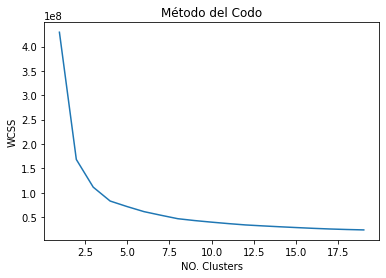

In [ ]:
plt.plot(range(1, 20), wcss)
plt.title('Método del Codo')
plt.xlabel('NO. Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans_cliente = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_pred = kmeans_cliente.fit_predict(fichero_kmeans.drop('LLAVE', axis = 1))

In [ ]:
ETIQUETAS = kmeans_cliente.labels_
len(ETIQUETAS)

In [ ]:
fichero_kmeans['CLUSTER'] = ETIQUETAS
fichero_kmeans.head(5)

In [ ]:
fichero_kmeans_final = fichero_kmeans[['LLAVE', 'CLUSTER']]
fichero_kmeans_final.head(5)

In [ ]:
fichero_kmeans_final.shape

In [ ]:
fichero_kmeans_final.groupby('CLUSTER').count()

In [ ]:
fichero_kmeans_final.to_csv('FICHERO_KMEANS_FINAL.csv')

In [ ]:
files.download('FICHERO_KMEANS_FINAL.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###**Filtro K-means - Media Ponderada**

####**Cluster = 0**

In [ ]:
uploaded = files.upload()

In [ ]:
matriz_reducida = pd.read_csv('/content/MATRIZ_REDUCIDA.csv', sep = ',', encoding = 'latin-1')

In [ ]:
fichero_kmeans_final = pd.read_csv('/content/FICHERO_KMEANS_FINAL.csv', sep = ',', encoding = 'latin-1')

In [ ]:
matriz_reducida = matriz_reducida.drop('Unnamed: 0', axis = 1)
matriz_reducida.head(2)

In [ ]:
fichero_kmeans_final = fichero_kmeans_final.drop('Unnamed: 0', axis = 1)
fichero_kmeans_final.head(2)

In [ ]:
fichero_cluster = pd.merge(matriz_reducida, fichero_kmeans_final, on = 'LLAVE', how = 'inner')

In [ ]:
fichero_cluster.head(5)

In [ ]:
fichero_cluster.isnull().sum()

In [ ]:
fichero_cluster.shape

In [ ]:
fichero_K0 = fichero_cluster[fichero_cluster['CLUSTER'] == 0]

In [ ]:
fichero_K0.head(2)

In [ ]:
fichero_K0.shape

In [ ]:
X = fichero_K0.copy()
y = fichero_K0['LLAVE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

In [ ]:
matriz_cal_K0 = X_train.pivot_table(values = 'CALIFICACION', index = 'LLAVE', columns = 'CATEGORIA_ID')

In [ ]:
matriz_cal_K0_copia = matriz_cal_K0.copy().fillna(0)

In [ ]:
similarity_K0 = cosine_similarity(matriz_cal_K0_copia, matriz_cal_K0_copia)

In [ ]:
similarity_K0 = pd.DataFrame(similarity_K0, index = matriz_cal_K0.index, columns = matriz_cal_K0.index)

In [ ]:
similarity_K0.head(2)

In [ ]:
def modelo_media_ponderada_K0(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in matriz_cal_K0:

    #Obtenemos los scores de similitud del cliente analizado y todos los demás
    scores = similarity_K0[llave]

    #Obtenemos las tasas de los clientes de la categoría buscada
    ratings = matriz_cal_K0[categoria_id]

    #Identificamos todos los missing values de la serie ratings
    indices = ratings[ratings.isnull()].index

    #Eliminamos todos los missing values de la serie ratings
    ratings = ratings.dropna()

    #Eliminamos los scores de similitud correspondientes a los clientes con missing values
    scores = scores.drop(indices)

    #Calculamos la media ponderada
    tasa_promedio_ponderada = np.dot(scores, ratings) / scores.sum() 

  else:
    tasa_promedio_ponderada = 3

  return tasa_promedio_ponderada

In [ ]:
score(modelo_media_ponderada_K0)

1.7787516226762268

####**Cluster = 1**

In [ ]:
fichero_K1 = fichero_cluster[fichero_cluster['CLUSTER'] == 1]

In [ ]:
fichero_K1.head(2)

In [ ]:
fichero_K1.shape

In [ ]:
X = fichero_K1.copy()
y = fichero_K1['LLAVE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

In [ ]:
matriz_cal_K1 = X_train.pivot_table(values = 'CALIFICACION', index = 'LLAVE', columns = 'CATEGORIA_ID')

In [ ]:
matriz_cal_K1_copia = matriz_cal_K1.copy().fillna(0)

In [ ]:
similarity_K1 = cosine_similarity(matriz_cal_K1_copia, matriz_cal_K1_copia)

In [ ]:
similarity_K1 = pd.DataFrame(similarity_K1, index = matriz_cal_K1.index, columns = matriz_cal_K1.index)

In [ ]:
similarity_K1.head(2)

In [ ]:
def modelo_media_ponderada_K1(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in matriz_cal_K1:

    #Obtenemos los scores de similitud del cliente analizado y todos los demás
    scores = similarity_K1[llave]

    #Obtenemos las tasas de los clientes de la categoría buscada
    ratings = matriz_cal_K1[categoria_id]

    #Identificamos todos los missing values de la serie ratings
    indices = ratings[ratings.isnull()].index

    #Eliminamos todos los missing values de la serie ratings
    ratings = ratings.dropna()

    #Eliminamos los scores de similitud correspondientes a los clientes con missing values
    scores = scores.drop(indices)

    #Calculamos la media ponderada
    tasa_promedio_ponderada = np.dot(scores, ratings) / scores.sum() 

  else:
    tasa_promedio_ponderada = 3

  return tasa_promedio_ponderada

In [ ]:
score(modelo_media_ponderada_K1)

1.7877665723214364

####**Cluster = 2**

In [ ]:
fichero_K2 = fichero_cluster[fichero_cluster['CLUSTER'] == 2]

In [ ]:
fichero_K2.head(2)

In [ ]:
fichero_K2.shape

In [ ]:
X = fichero_K2.copy()
y = fichero_K2['LLAVE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

In [ ]:
matriz_cal_K2 = X_train.pivot_table(values = 'CALIFICACION', index = 'LLAVE', columns = 'CATEGORIA_ID')

In [ ]:
matriz_cal_K2_copia = matriz_cal_K2.copy().fillna(0)

In [ ]:
similarity_K2 = cosine_similarity(matriz_cal_K2_copia, matriz_cal_K2_copia)

In [ ]:
similarity_K2 = pd.DataFrame(similarity_K2, index = matriz_cal_K2.index, columns = matriz_cal_K2.index)

In [ ]:
similarity_K2.head(2)

In [ ]:
def modelo_media_ponderada_K2(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in matriz_cal_K2:

    #Obtenemos los scores de similitud del cliente analizado y todos los demás
    scores = similarity_K2[llave]

    #Obtenemos las tasas de los clientes de la categoría buscada
    ratings = matriz_cal_K2[categoria_id]

    #Identificamos todos los missing values de la serie ratings
    indices = ratings[ratings.isnull()].index

    #Eliminamos todos los missing values de la serie ratings
    ratings = ratings.dropna()

    #Eliminamos los scores de similitud correspondientes a los clientes con missing values
    scores = scores.drop(indices)

    #Calculamos la media ponderada
    tasa_promedio_ponderada = np.dot(scores, ratings) / scores.sum() 

  else:
    tasa_promedio_ponderada = 3

  return tasa_promedio_ponderada

In [ ]:
score(modelo_media_ponderada_K2)

1.7886736796566534

####**Cluster = 3**

In [ ]:
fichero_K3 = fichero_cluster[fichero_cluster['CLUSTER'] == 3]

In [ ]:
fichero_K3.head(2)

In [ ]:
fichero_K3.shape

In [ ]:
X = fichero_K3.copy()
y = fichero_K3['LLAVE']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 0)

In [ ]:
matriz_cal_K3 = X_train.pivot_table(values = 'CALIFICACION', index = 'LLAVE', columns = 'CATEGORIA_ID')

In [ ]:
matriz_cal_K3_copia = matriz_cal_K3.copy().fillna(0)

In [ ]:
similarity_K3 = cosine_similarity(matriz_cal_K3_copia, matriz_cal_K3_copia)

In [ ]:
similarity_K3 = pd.DataFrame(similarity_K3, index = matriz_cal_K3.index, columns = matriz_cal_K3.index)

In [ ]:
similarity_K3.head(2)

In [ ]:
def modelo_media_ponderada_K3(llave, categoria_id):

  #Validamos si la categoría existe en la matriz
  if categoria_id in matriz_cal_K3:

    #Obtenemos los scores de similitud del cliente analizado y todos los demás
    scores = similarity_K3[llave]

    #Obtenemos las tasas de los clientes de la categoría buscada
    ratings = matriz_cal_K3[categoria_id]

    #Identificamos todos los missing values de la serie ratings
    indices = ratings[ratings.isnull()].index

    #Eliminamos todos los missing values de la serie ratings
    ratings = ratings.dropna()

    #Eliminamos los scores de similitud correspondientes a los clientes con missing values
    scores = scores.drop(indices)

    #Calculamos la media ponderada
    tasa_promedio_ponderada = np.dot(scores, ratings) / scores.sum() 

  else:
    tasa_promedio_ponderada = 3

  return tasa_promedio_ponderada

In [ ]:
score(modelo_media_ponderada_K3)

1.7722943949446586

#**Construcción y evaluación Modelos Libreria Surprise**

Finalmente vamos a instalar y utilizar el paquete surprise que por definición es la libreria especializada en recommended systems

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 7.1 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1623295 sha256=713ca5a546ab56f2d36aac036f8ef39d7d5c8a08c2bf39ceccefe5be04f34e60
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset, KNNBasic, SVD
from surprise.model_selection import cross_validate

In [ ]:
conteo_Knn = matriz_reducida.groupby('LLAVE').count()
conteo_Knn = conteo_Knn.sort_values(by = 'CATEGORIA_ID', axis = 0, ascending = False)
conteo_Knn

In [ ]:
lista_hiper_top = conteo_Knn[0:13000]
lista_hiper_top = lista_hiper_top.reset_index()
lista_hiper_top = lista_hiper_top[['LLAVE']]
len(lista_hiper_top)

In [ ]:
#Para esta evaluación tomaremos como referencia a los 13 mil clientes con mayor 
#número de interacciones
matriz_hiper_reducida = pd.merge(matriz_reducida, lista_hiper_top, on = 'LLAVE', how = 'inner')

In [ ]:
matriz_hiper_reducida.shape

In [ ]:
#En esta librería todo es muy sencillo, simplemente se instancian los objetos
#y se corre el sistema recomendador
reader = Reader()

data = Dataset.load_from_df(matriz_hiper_reducida, reader)

Knn = KNNBasic()

cross_validate(Knn, data, measures=['rmse'], cv = 2)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


{'fit_time': (25.88408899307251, 23.37710928916931),
 'test_rmse': array([1.5712897 , 1.55965309]),
 'test_time': (210.28350639343262, 199.13392066955566)}

In [ ]:
#En esta librería todo es muy sencillo, simplemente se instancian los objetos
#y se corre el sistema recomendador
reader = Reader()

data = Dataset.load_from_df(matriz_reducida, reader)

svd = SVD()

cross_validate(svd, data, measures=['rmse'], cv = 5)

{'fit_time': (8.8258056640625,
  8.241648435592651,
  8.255877494812012,
  8.188127756118774,
  8.190804958343506),
 'test_rmse': array([1.54592881, 1.54545143, 1.5486996 , 1.55326448, 1.54812732]),
 'test_time': (0.4346761703491211,
  0.29572439193725586,
  0.4271693229675293,
  0.47066831588745117,
  0.4754157066345215)}